In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Constants
data_dir = "train"  # Directory containing images
img_size = 128      # Resize images to 128x128
batch_size = 32     # Batch size for training

def load_data(data_dir, img_size):
    images = []
    labels = []
    for file_name in os.listdir(data_dir):
        if file_name.startswith("cat"):
            labels.append(0)  # Label 0 for cats
        elif file_name.startswith("dog"):
            labels.append(1)  # Label 1 for dogs
        else:
            continue
        img_path = os.path.join(data_dir, file_name)
        img = tf.keras.utils.load_img(img_path, target_size=(img_size, img_size))
        img = tf.keras.utils.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images), np.array(labels)

print("Loading images...")
X, y = load_data(data_dir, img_size)
print(f"Loaded {len(X)} images.")

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")


Loading images...
Loaded 14984 images.
Training samples: 11987, Validation samples: 2997


In [2]:
import os
import shutil
import tensorflow as tf

# Constants
data_dir = "train"  
output_dir = "test" 
img_size = 128      # Resize images to 128x128

# Create the output directories if they don't exist
cats_dir = os.path.join(output_dir, "cats")
dogs_dir = os.path.join(output_dir, "dogs")

os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

def sort_images(data_dir, output_dir):
    for file_name in os.listdir(data_dir):
        if file_name.startswith("cat"):
            # Move to cats folder
            src = os.path.join(data_dir, file_name)
            dst = os.path.join(cats_dir, file_name)
            shutil.move(src, dst)
        elif file_name.startswith("dog"):
            # Move to dogs folder
            src = os.path.join(data_dir, file_name)
            dst = os.path.join(dogs_dir, file_name)
            shutil.move(src, dst)

print("Sorting images into 'cats' and 'dogs' folders...")
sort_images(data_dir, output_dir)
print("Sorting complete.")


Sorting images into 'cats' and 'dogs' folders...
Sorting complete.


Found 14984 images belonging to 2 classes.


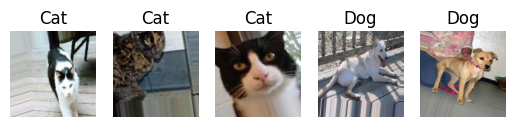

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directories
train_dir = "test"  # Directory with 'cats' and 'dogs' subdirectories
img_size = 128              # Resize images to 128x128
batch_size = 32             # Batch size for training

# Create ImageDataGenerators for loading the data
train_datagen = ImageDataGenerator(rescale=1./255,  
                                   rotation_range=20,  
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,  
                                   shear_range=0.2,  
                                   zoom_range=0.2,  
                                   horizontal_flip=True,  
                                   fill_mode='nearest')  

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Directory with 'cats' and 'dogs' subdirectories
    target_size=(img_size, img_size),  # Resize images to 128x128
    batch_size=batch_size,
    class_mode='binary',  # Binary classification (cat = 0, dog = 1)
    shuffle=True  # Shuffle the data
)

# Plot a few sample images
def plot_samples():
    images, labels = next(train_generator)
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.title('Cat' if labels[i] == 0 else 'Dog')
        plt.axis('off')
    plt.show()

plot_samples()


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),  # First convolution layer
    MaxPooling2D(2, 2),  # Max-pooling layer

    Conv2D(64, (3, 3), activation='relu'),  # Second convolution layer
    MaxPooling2D(2, 2),  # Max-pooling layer

    Conv2D(128, (3, 3), activation='relu'),  # Third convolution layer
    MaxPooling2D(2, 2),  # Max-pooling layer

    Flatten(),  
    Dense(512, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(
    train_generator,  # Training data
    steps_per_epoch=train_generator.samples // batch_size,  # Number of batches per epoch
    epochs=10,  # Number of epochs to train
    verbose=1  # Show progress
)


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 188s 399ms/step - accuracy: 0.8280 - loss: 0.4942
Epoch 2/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.8125 - loss: 0.4644   
Epoch 3/10


C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


468/468 ━━━━━━━━━━━━━━━━━━━━ 186s 398ms/step - accuracy: 0.8362 - loss: 0.4336
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.8438 - loss: 0.4639    
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 178s 381ms/step - accuracy: 0.8405 - loss: 0.4100
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9062 - loss: 0.2751     
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 181s 386ms/step - accuracy: 0.8427 - loss: 0.4013
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.9062 - loss: 0.2861    
Epoch 9/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 181s 386ms/step - accuracy: 0.8470 - loss: 0.3881
Epoch 10/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.9688 - loss: 0.2634    


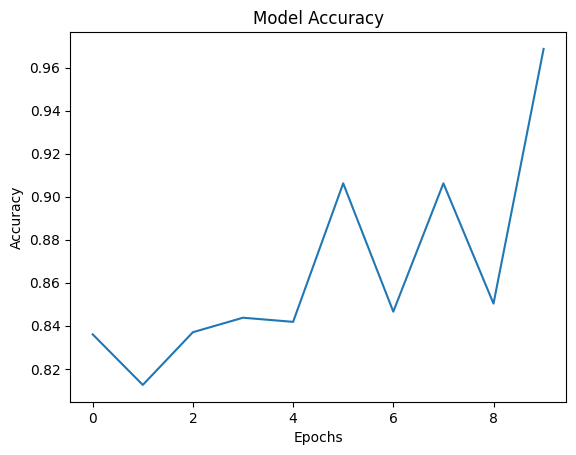

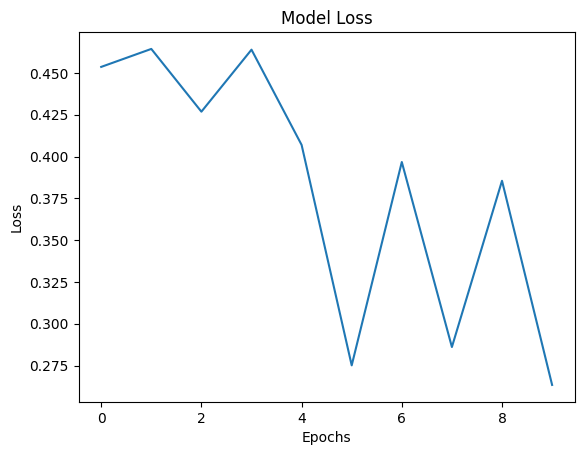

In [6]:
# Plot accuracy and loss
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

plot_training_history(history)


In [9]:
# Evaluate the model on the validation data
# Assuming you have a validation generator, you can use it to evaluate:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    'test',  # Change to your validation directory
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


Found 14984 images belonging to 2 classes.
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9449 - loss: 0.2357
Validation Loss: 0.34701982140541077, Validation Accuracy: 0.8633208870887756


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


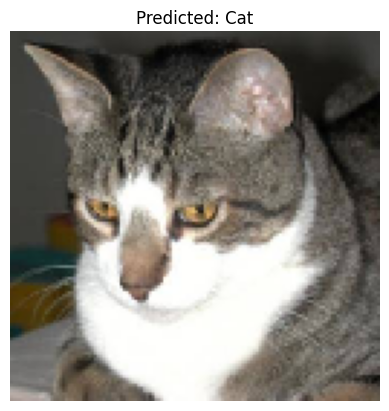

The image is predicted to be a: Cat


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to predict the class of a single image
def predict_image(img_path, model, img_size=128):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    
    # Convert the prediction into a label
    predicted_class = "Dog" if prediction[0][0] > 0.5 else "Cat"
    
    # Show the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axes
    plt.title(f"Predicted: {predicted_class}")
    plt.show()
    
    return predicted_class

# Test the prediction function with an image
test_image_path = "test/cats/cat.38.jpg"  # Replace with your image path
result = predict_image(test_image_path, model)
print(f"The image is predicted to be a: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


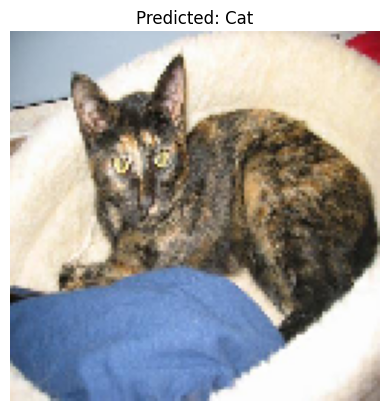

The image is predicted to be a: Cat


In [26]:
test_image_path = "test/cats/cat.31.jpg"  # Replace with your image path
result = predict_image(test_image_path, model)
print(f"The image is predicted to be a: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


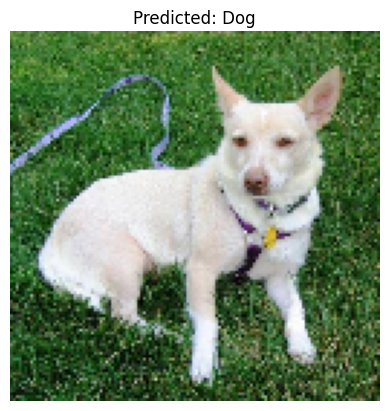

The image is predicted to be a: Dog


In [27]:
test_image_path = "test/dogs/dogi.jpg"  # Replace with your image path
result = predict_image(test_image_path, model)
print(f"The image is predicted to be a: {result}")